In [1]:
# Neccessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [2]:
df_train=pd.read_csv("./Dataset/Train.csv")
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
df_test=pd.read_csv("./Dataset/Test.csv")
df_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

### As we can see there are some missing values which will need to be filled

In [6]:
df_train.drop('Employee_ID',axis=1,inplace=True)
df_train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [7]:
df_test.drop('Employee_ID',axis=1,inplace=True)
df_test.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


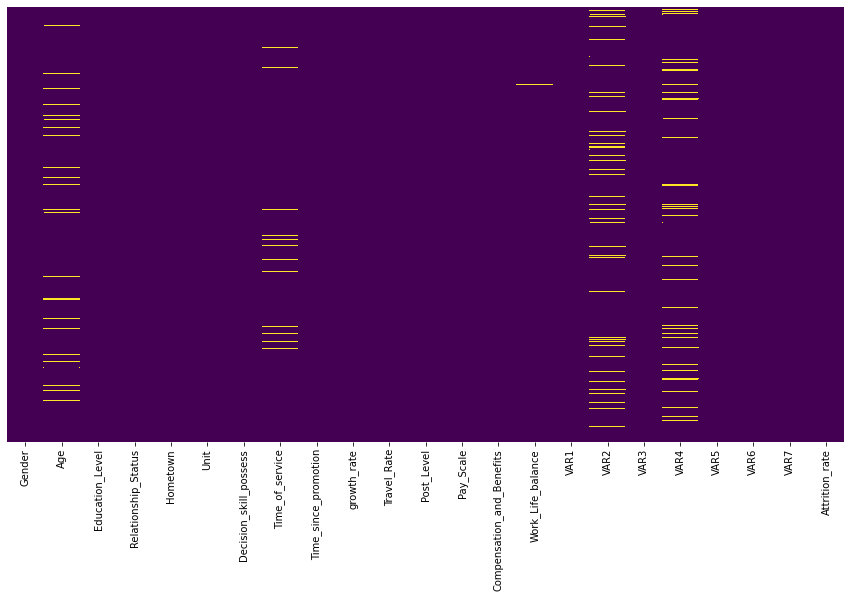

In [8]:
## Heatmap plotting for null values for train data
plt.figure(figsize=(15,8))
sns.heatmap(data=df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

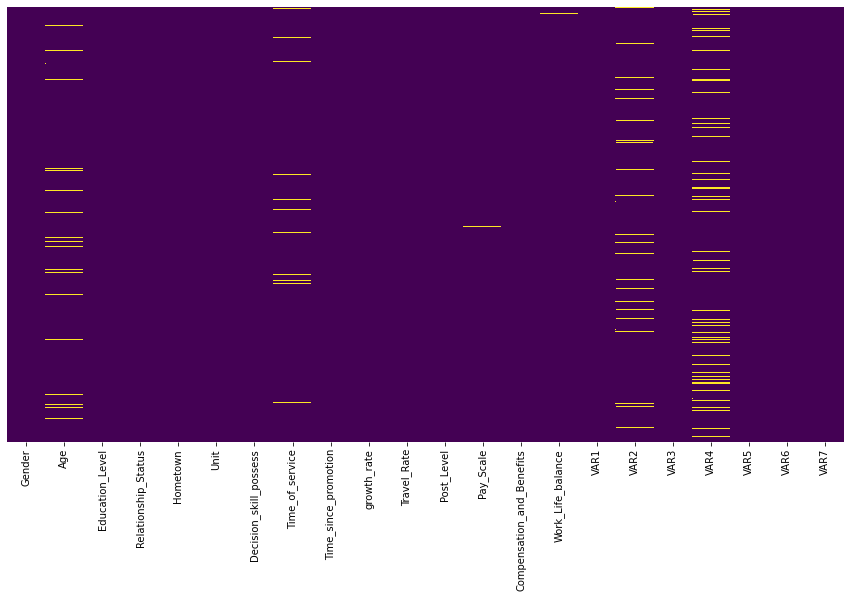

In [9]:
## Heatmap plotting for null values for train data
plt.figure(figsize=(15,8))
sns.heatmap(data=df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#Impute Age on dataset
def impute_age(cols):
    Age=cols[0]
    EdLevel=cols[1]
    if pd.isnull(Age):
        if EdLevel==1:
            return 39
        elif EdLevel==2 or EdLevel==5:
            return 38
        else:
            return 47
    return Age           

In [11]:
#Impute Time of service on dataset
def impute_tos(cols):
    tos=cols[0]
    EdLevel=cols[1]
    if pd.isnull(tos):
        if EdLevel==1 or EdLevel==2:
            return 11
        else:
            return 10
    return tos           

In [12]:
# Imputing Age and TOS for Train Data
df_train['Age']=df_train[['Age','Education_Level']].apply(impute_age,axis=1)
df_train['Time_of_service']=df_train[['Time_of_service','Education_Level']].apply(impute_tos,axis=1)
df_train.isnull().sum()

Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [13]:
# Imputing Age and TOS for Test Data
df_test['Age']=df_test[['Age','Education_Level']].apply(impute_age,axis=1)
df_test['Time_of_service']=df_test[['Time_of_service','Education_Level']].apply(impute_tos,axis=1)
df_test.isnull().sum()

Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [14]:
# Filling VAR2 and VAR4 with mean for train data
# df_train['VAR2'].fillna(df_train['VAR2'].mean(),inplace=True)
# df_train['VAR4'].fillna(df_train['VAR4'].mean(),inplace=True)

df_train['VAR2'].fillna(df_train['VAR2'].mode()[0],inplace=True)
df_train['VAR4'].fillna(df_train['VAR4'].mode()[0],inplace=True)

In [15]:
# Filling VAR2 and VAR4 with mean for test data
# df_test['VAR2'].fillna(df_test['VAR2'].mean(),inplace=True)
# df_test['VAR4'].fillna(df_test['VAR4'].mean(),inplace=True)

df_test['VAR2'].fillna(df_test['VAR2'].mode()[0],inplace=True)
df_test['VAR4'].fillna(df_test['VAR4'].mode()[0],inplace=True)

In [16]:
# Filling Payscale and work life balance with mean for train data
df_train['Pay_Scale'].fillna(df_train['Pay_Scale'].mode()[0],inplace=True)
df_train['Work_Life_balance'].fillna(df_train['Work_Life_balance'].mode()[0],inplace=True)

In [17]:
# Filling Payscale and work life balance with mean for test data
df_test['Pay_Scale'].fillna(df_test['Pay_Scale'].mode()[0],inplace=True)
df_test['Work_Life_balance'].fillna(df_test['Work_Life_balance'].mode()[0],inplace=True)

In [18]:
# Interpolating values for  Payscale and Work Life Balance for train data
# df_train['Pay_Scale'].interpolate(method ='linear', limit_direction ='forward',inplace=True)

In [19]:
# df_train['Work_Life_balance'].interpolate(method ='linear', limit_direction ='forward',inplace=True)

In [20]:
# df_train.isnull().sum()

In [21]:
# # Interpolating values for  Payscale and Work Life Balance for test data
# df_test['Pay_Scale'].interpolate(method ='linear', limit_direction ='forward',inplace=True)
# df_test['Work_Life_balance'].interpolate(method ='linear', limit_direction ='forward',inplace=True)
# df_test.isnull().sum()

## Converting Categorical Variables to Numerical Categories

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [23]:
#Gender Column Train Data
le=LabelEncoder()
df_train['Gender']=le.fit_transform(df_train['Gender'])
df_train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,0,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,0,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,0,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [24]:
#Gender Column Test Data
df_test['Gender']=le.transform(df_test['Gender'])
df_test.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,1,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,1,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,0,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [25]:
#Relationship_Status Column Train Data
df_train['Relationship_Status']=le.fit_transform(df_train['Relationship_Status'])
df_train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,0,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1,24.0,3,1,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,0,58.0,3,0,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,0,26.0,3,1,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,0,31.0,1,0,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [26]:
#Relationship_Status Column Test Data
df_test['Relationship_Status']=le.transform(df_test['Relationship_Status'])
df_test.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,32.0,5,1,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,1,65.0,2,1,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1,52.0,3,0,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,1,50.0,5,1,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,0,44.0,3,0,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [27]:
#Implementing OneHotEncoding
Hometown=pd.get_dummies(data=df_train['Hometown'],prefix='Hometown',drop_first=True)
Hometown.head()

,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington
0,1,0,0,0
1,0,0,1,0
2,0,0,0,0
3,0,1,0,0
4,0,0,1,0


In [28]:
#Implementing OneHotEncoding
Hometown2=pd.get_dummies(data=df_test['Hometown'],prefix='Hometown',drop_first=True)
Hometown2.head()

,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [29]:
Unit=pd.get_dummies(data=df_train['Unit'],prefix='Unit',drop_first=True)
Unit.head()

,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
Unit2=pd.get_dummies(data=df_test['Unit'],prefix='Unit',drop_first=True)
Unit2.head()

,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security
0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [31]:
DecisionSkill=pd.get_dummies(data=df_train['Decision_skill_possess'],prefix='DecSkill',drop_first=True)
DecisionSkill.head()

,DecSkill_Behavioral,DecSkill_Conceptual,DecSkill_Directive
0,0,1,0
1,0,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [32]:
DecisionSkill2=pd.get_dummies(data=df_test['Decision_skill_possess'],prefix='DecSkill',drop_first=True)
DecisionSkill2.head()

,DecSkill_Behavioral,DecSkill_Conceptual,DecSkill_Directive
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [33]:
Comp=pd.get_dummies(data=df_train['Compensation_and_Benefits'],prefix='Comp&Benifits',drop_first=True)
Comp.head()

,Comp&Benifits_type1,Comp&Benifits_type2,Comp&Benifits_type3,Comp&Benifits_type4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [34]:
Comp2=pd.get_dummies(data=df_test['Compensation_and_Benefits'],prefix='Comp&Benifits',drop_first=True)
Comp2.head()

,Comp&Benifits_type1,Comp&Benifits_type2,Comp&Benifits_type3,Comp&Benifits_type4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,0
4,0,1,0,0


In [35]:
#Removing The encoded columns from dataframes
df_train.drop(['Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],inplace=True,axis=1)
df_test.drop(['Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],inplace=True,axis=1)

In [36]:
#Concatenation of dataframes with new columns
df_train=pd.concat([df_train,Hometown,Unit,DecisionSkill,Comp],axis=1)
df_test=pd.concat([df_test,Hometown2,Unit2,DecisionSkill2,Comp2],axis=1)

In [37]:
X_train=df_train.drop('Attrition_rate',axis=1)
y_train=df_train['Attrition_rate']

In [38]:
X_test=df_test

In [39]:
X_train

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,DecSkill_Behavioral,DecSkill_Conceptual,DecSkill_Directive,Comp&Benifits_type1,Comp&Benifits_type2,Comp&Benifits_type3,Comp&Benifits_type4
0,0,42.0,4,0,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,24.0,3,1,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,58.0,3,0,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,0,26.0,3,1,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,31.0,1,0,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,23.0,5,0,4.0,1,20,1,2,6.0,3.0,1,0.7516,-0.4537,2.0,3,7,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
6996,0,44.0,1,0,16.0,2,59,0,2,4.0,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6997,0,49.0,3,1,10.0,1,59,1,2,3.0,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6998,0,47.0,3,0,24.0,1,21,1,5,8.0,2.0,4,0.7516,1.8688,2.0,3,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [40]:
X_test

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,DecSkill_Behavioral,DecSkill_Conceptual,DecSkill_Directive,Comp&Benifits_type1,Comp&Benifits_type2,Comp&Benifits_type3,Comp&Benifits_type4
0,0,32.0,5,1,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,1,65.0,2,1,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,52.0,3,0,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,1,50.0,5,1,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,44.0,3,0,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,32.0,3,1,3.0,3,38,1,3,6.0,2.0,1,-0.1048,0.7075,1.0,4,7,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2996,0,38.0,2,1,10.0,2,57,1,4,9.0,1.0,3,0.7516,0.7075,3.0,4,8,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2997,0,60.0,4,1,35.0,1,69,0,2,9.0,3.0,3,-1.8176,-0.4537,2.0,4,8,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2998,0,51.0,1,0,23.0,1,30,0,2,6.0,1.0,5,0.7516,-0.4537,2.0,3,9,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Scaling the data

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
X_test_scaled=scaler.transform(X_test)

# Modelling

In [43]:
from sklearn.linear_model import Ridge,Lasso,BayesianRidge
from xgboost import XGBRegressor

In [44]:
ridgeReg=Ridge(alpha=1600,tol=1e-20)
ridgeReg.fit(X_train_scaled,y_train)

Ridge(alpha=1600, tol=1e-20)

In [45]:
lassoReg=Lasso(alpha=0.001)
lassoReg.fit(X_train_scaled,y_train)

Lasso(alpha=0.001)

In [68]:
bRidgeReg=BayesianRidge(alpha_1=1e-10,alpha_2=22,lambda_1=1e-12,lambda_2=1e-5)
bRidgeReg.fit(X_train_scaled,y_train)

BayesianRidge(alpha_1=1e-10, alpha_2=22, lambda_1=1e-12, lambda_2=1e-05)

In [47]:
xgbReg=XGBRegressor(n_estimators=10,booster='gbtree')
xgbReg.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
# Making Predictions Ridge
pred_yRidge=ridgeReg.predict(X_test_scaled)

In [49]:
# Making Predictions XGB
pred_yXGB=xgbReg.predict(X_test_scaled)

In [50]:
# Making Predictions Lasso
pred_yLasso=lassoReg.predict(X_test_scaled)

In [69]:
# Making Predictions BRidge
pred_ybRidge=bRidgeReg.predict(X_test_scaled)

# Compiling save format

In [52]:
finalDF=pd.read_csv('./Dataset/Test.csv')
finalDF.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [53]:
finalDF=finalDF[['Employee_ID']]
finalDF.head()

,Employee_ID
0,EID_22713
1,EID_9658
2,EID_22203
3,EID_7652
4,EID_6516


In [54]:
datasetRidge = pd.DataFrame({'Attrition_rate': pred_yRidge})
datasetRidge

,Attrition_rate
0,0.199050
1,0.191866
2,0.192781
3,0.196211
4,0.193094
...,...
2995,0.194055
2996,0.189326
2997,0.181657
2998,0.174320


In [55]:
datasetXGB = pd.DataFrame({'Attrition_rate': pred_yXGB})
datasetXGB

,Attrition_rate
0,0.267979
1,0.236085
2,0.267856
3,0.222630
4,0.193305
...,...
2995,0.172199
2996,0.164764
2997,0.223980
2998,0.225597


In [70]:
datasetBRidge = pd.DataFrame({'Attrition_rate': pred_ybRidge})
datasetBRidge

,Attrition_rate
0,0.197506
1,0.191548
2,0.192403
3,0.194964
4,0.192443
...,...
2995,0.193334
2996,0.189559
2997,0.182863
2998,0.176724


In [57]:
datasetLasso = pd.DataFrame({'Attrition_rate': pred_yLasso})
datasetLasso

,Attrition_rate
0,0.191211
1,0.192466
2,0.194638
3,0.197156
4,0.188966
...,...
2995,0.189825
2996,0.188837
2997,0.188864
2998,0.175963


In [58]:
#Combining them Ridge
submissionDFRidge = pd.concat([finalDF,datasetRidge],axis=1)
submissionDFRidge.columns = ['Employee_ID','Attrition_rate']  #naming the dataframe columns

In [59]:
#Combining them XGB
submissionDFXGB = pd.concat([finalDF,datasetXGB],axis=1)
submissionDFXGB.columns = ['Employee_ID','Attrition_rate']  #naming the dataframe columns

In [60]:
#Combining them Lasso
submissionDFLasso = pd.concat([finalDF,datasetLasso],axis=1)
submissionDFLasso.columns = ['Employee_ID','Attrition_rate']  #naming the dataframe columns

In [71]:
#Combining them BRidge
submissionDFBRidge = pd.concat([finalDF,datasetBRidge],axis=1)
submissionDFBRidge.columns = ['Employee_ID','Attrition_rate']  #naming the dataframe columns

In [62]:
submissionDFRidge

,Employee_ID,Attrition_rate
0,EID_22713,0.199050
1,EID_9658,0.191866
2,EID_22203,0.192781
3,EID_7652,0.196211
4,EID_6516,0.193094
...,...,...
2995,EID_22547,0.194055
2996,EID_10066,0.189326
2997,EID_7126,0.181657
2998,EID_4929,0.174320


In [63]:
submissionDFXGB

,Employee_ID,Attrition_rate
0,EID_22713,0.267979
1,EID_9658,0.236085
2,EID_22203,0.267856
3,EID_7652,0.222630
4,EID_6516,0.193305
...,...,...
2995,EID_22547,0.172199
2996,EID_10066,0.164764
2997,EID_7126,0.223980
2998,EID_4929,0.225597


In [64]:
# Saving submission df Ridge
submissionDFRidge.to_csv('./Dataset/Harshit_submission_ridge3.csv',index=False)

In [65]:
# Saving submission df XGB
submissionDFXGB.to_csv('./Dataset/Harshit_submission_xgb3.csv',index=False)

In [66]:
# Saving submission df Lasso
submissionDFLasso.to_csv('./Dataset/Harshit_submission_lasso3.csv',index=False)

In [72]:
# Saving submission df BRidge
submissionDFBRidge.to_csv('./Dataset/Harshit_submission_bridge4.csv',index=False)